In [30]:
import pandas as pd

# Load the dataset (replace 'preprocessed_dataset.csv' with your exact filename if different)
df = pd.read_csv('oral_cancer_prediction_preprocessed_dataset.csv')  # If it's tab-separated, use sep='\t'

# Display the first few rows to verify
print(df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.699575  0.313334  0.560447 -0.336918 -1.106020 -0.598798 -1.297696   
1  0.673053 -0.184050  0.576740  1.757344  0.923448  0.746739  0.469264   
2  0.048024 -1.360864 -0.405148 -1.030663  0.777152 -0.456549 -1.895424   
3  1.604668  1.710142 -1.364305 -0.267710 -1.416786  0.038920  1.422042   
4 -2.382625 -1.884699 -0.133362  0.650046 -0.265694 -1.245969  1.377394   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0 -0.724275 -1.637012 -0.821648 -0.459853 -1.457710 -1.369914 -0.223944   
1  1.723204  1.723343  0.136200 -0.024877 -1.790372 -1.337522 -0.206183   
2  1.622114 -1.418006  0.072663 -0.075828 -1.864626  0.332051  0.028287   
3  0.459523  0.031274 -0.796306 -0.435965 -0.193531  0.313675 -0.175422   
4  0.832647  1.254113  0.252565 -0.999554 -0.251933  0.640998  0.796805   

       PC15  Oral Cancer (Diagnosis)  
0 -0.056514                        0  
1 -0.059692         

In [29]:
# Features (X): All columns except the target
X = df.drop('Oral Cancer (Diagnosis)', axis=1)

# Target variable (y): Only the 'Oral Cancer (Diagnosis)' column
y = df['Oral Cancer (Diagnosis)']

# Verify the shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (82715, 15)
Target shape: (82715,)


In [32]:
from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (66172, 15)
X_test shape: (16543, 15)
y_train shape: (66172,)
y_test shape: (16543,)


In [33]:
# Feature names
print("Feature names:", X.columns.tolist())

# Data types
print("\nData types:\n", X.dtypes)

# Summary statistics (for quick overview)
print("\nSummary:\n", X.describe())

Feature names: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15']

Data types:
 PC1     float64
PC2     float64
PC3     float64
PC4     float64
PC5     float64
PC6     float64
PC7     float64
PC8     float64
PC9     float64
PC10    float64
PC11    float64
PC12    float64
PC13    float64
PC14    float64
PC15    float64
dtype: object

Summary:
                 PC1           PC2           PC3           PC4           PC5  \
count  8.271500e+04  8.271500e+04  8.271500e+04  8.271500e+04  8.271500e+04   
mean  -4.836089e-14 -8.100106e-13  2.055249e-13 -1.329868e-13  6.528454e-13   
std    1.679859e+00  1.286354e+00  1.242406e+00  1.015157e+00  1.009932e+00   
min   -3.783135e+00 -3.677662e+00 -1.477737e+00 -3.359466e+00 -2.579984e+00   
25%   -1.183470e+00 -9.802094e-01 -6.904462e-01 -7.044431e-01 -7.087421e-01   
50%    5.372186e-02 -1.408190e-01 -4.068295e-01 -1.134870e-02 -7.264681e-02   
75%    1.140425e+00  8.413970e-01  5.6260

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete. Sample of scaled X_train:\n", X_train_scaled[:5])

Scaling complete. Sample of scaled X_train:
 [[ 1.76032748  0.92737331 -1.09126386  0.39122731 -1.84924439 -0.12172676
  -1.24184609  1.8678446  -0.76812752  0.02509287  1.81853056 -0.57856871
   0.50873631 -0.23504593  1.06720899]
 [ 0.31617917 -0.70400384  0.68576509 -1.53247008  0.22411597 -1.81179626
  -1.52152761  0.5565054   0.22660713 -0.32451459 -1.11008639 -1.16195213
  -1.20474946  0.89986292  0.81902067]
 [ 1.2436714   1.67901447 -0.12409356 -0.18479829  0.71152912 -0.32665609
   0.31052964 -0.39034631 -1.50612161  0.13052594 -1.58841625 -0.15121992
  -1.19711754  0.60468763  0.7535765 ]
 [ 0.58692544  0.64781064 -0.8980038   0.42212369 -0.76618261  1.25436405
   1.6557397   1.42884042 -1.31887559  0.30820245  0.78746465 -0.8519437
   1.03381795  0.99773046  1.14340353]
 [-0.78853173 -0.66045354 -0.33789848 -0.89468295 -1.03552236  1.35592488
   1.22187541 -0.59952184 -0.34422205 -0.06548455  0.28655304  0.75252726
   0.3528247   0.03547667  1.15172953]]


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the base KNN model with defaults
knn_base = KNeighborsClassifier()

# Train on scaled training data
knn_base.fit(X_train_scaled, y_train)

print("Base KNN model trained with default parameters.")

Base KNN model trained with default parameters.


Base Model Accuracy: 0.49942573898325576
Base Model F1 Score: 0.5273132028083795
Base Model Confusion Matrix:
 [[3643 4368]
 [3913 4619]]


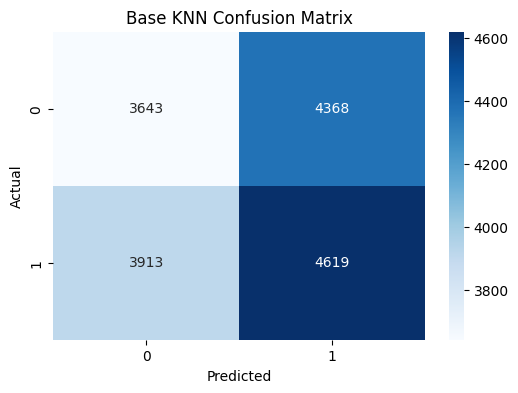

In [37]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on scaled test data
y_pred_base = knn_base.predict(X_test_scaled)

# Calculate metrics
accuracy_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)
cm_base = confusion_matrix(y_test, y_pred_base)

print("Base Model Accuracy:", accuracy_base)
print("Base Model F1 Score:", f1_base)
print("Base Model Confusion Matrix:\n", cm_base)

# Visualize confusion matrix (optional but recommended)
plt.figure(figsize=(6,4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Base KNN Confusion Matrix')
plt.show()

In [38]:
# List of K values to try
k_values = [1, 3, 5, 7, 9, 11]

# Dictionary to store results
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[k] = {'accuracy': accuracy, 'f1': f1}

print("Results for different K:")
for k, metrics in results.items():
    print(f"K={k}: Accuracy={metrics['accuracy']}, F1={metrics['f1']}")

Results for different K:
K=1: Accuracy=0.49434806262467507, F1=0.5108473188702415
K=3: Accuracy=0.49954663603941246, F1=0.5211406096361848
K=5: Accuracy=0.49942573898325576, F1=0.5273132028083795
K=7: Accuracy=0.501239194825606, F1=0.5306865366020136
K=9: Accuracy=0.49972798162364745, F1=0.5333258148189918
K=11: Accuracy=0.501239194825606, F1=0.5364346311590539


In [39]:
# Weights to try
weights_options = ['uniform', 'distance']

# Updated results dictionary
results_weights = {}

for weight in weights_options:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        key = f"{weight}_k{k}"
        results_weights[key] = {'accuracy': accuracy, 'f1': f1}

print("Results for different weights and K:")
for key, metrics in results_weights.items():
    print(f"{key}: Accuracy={metrics['accuracy']}, F1={metrics['f1']}")

Results for different weights and K:
uniform_k1: Accuracy=0.49434806262467507, F1=0.5108473188702415
uniform_k3: Accuracy=0.49954663603941246, F1=0.5211406096361848
uniform_k5: Accuracy=0.49942573898325576, F1=0.5273132028083795
uniform_k7: Accuracy=0.501239194825606, F1=0.5306865366020136
uniform_k9: Accuracy=0.49972798162364745, F1=0.5333258148189918
uniform_k11: Accuracy=0.501239194825606, F1=0.5364346311590539
distance_k1: Accuracy=0.49434806262467507, F1=0.5108473188702415
distance_k3: Accuracy=0.5006951580729009, F1=0.5081576753602477
distance_k5: Accuracy=0.5004533639605876, F1=0.5064500716674629
distance_k7: Accuracy=0.498579459590159, F1=0.5032636684831427
distance_k9: Accuracy=0.4997884301517258, F1=0.5043426175501647
distance_k11: Accuracy=0.49876080517439403, F1=0.5047186716043484


In [40]:
# Convert results to DataFrame for easy viewing
df_results = pd.DataFrame.from_dict(results_weights, orient='index')
df_results.index.name = 'Variation'
print(df_results)

# Identify best based on F1 (or accuracy if preferred)
best_variation = df_results['f1'].idxmax()
best_f1 = df_results['f1'].max()
print(f"Best variation: {best_variation} with F1={best_f1}")

              accuracy        f1
Variation                       
uniform_k1    0.494348  0.510847
uniform_k3    0.499547  0.521141
uniform_k5    0.499426  0.527313
uniform_k7    0.501239  0.530687
uniform_k9    0.499728  0.533326
uniform_k11   0.501239  0.536435
distance_k1   0.494348  0.510847
distance_k3   0.500695  0.508158
distance_k5   0.500453  0.506450
distance_k7   0.498579  0.503264
distance_k9   0.499788  0.504343
distance_k11  0.498761  0.504719
Best variation: uniform_k11 with F1=0.5364346311590539


In [41]:
# Example for feature selection using SelectKBest
from sklearn.feature_selection import SelectKBest, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Then retrain your best KNN on selected features, e.g.:
knn_improved = KNeighborsClassifier(n_neighbors=5, weights='uniform')  # Replace with your best params
knn_improved.fit(X_train_selected, y_train)
y_pred_improved = knn_improved.predict(X_test_selected)
print("Improved Accuracy:", accuracy_score(y_test, y_pred_improved))
print("Improved F1:", f1_score(y_test, y_pred_improved))

# Example for alternative normalization (MinMaxScaler instead of StandardScaler)
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

# Retrain and evaluate similarly as above

Improved Accuracy: 0.5022668198029377
Improved F1: 0.5305051887330369
